# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Hadid Ramadhan
- **Email:** m283b4ky1661@bangkit.academy
- **ID Dicoding:** Hadid Ramadhan

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak mendapat ulasan positif berdasarkan review score?
- Produk apa yang memiliki performa pembelian yang paling baik?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
products = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
product_name_translation = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv')
product_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
order_review = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_item = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
orders_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
product_translated = pd.merge(
    left=products,
    right=product_name_translation,
    on='product_category_name'
)

product_translated['product_category_name'] = product_translated['product_category_name_english']
product_translated.drop(columns='product_category_name_english', inplace=True)
product_translated.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_review = pd.merge(
    left=order_review,
    right=orders_item,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

products_review = pd.merge(
    left=products_review,
    right=product_translated,
    on='product_id'
)
products_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,sports_leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,79.79,8.30,computers_accessories,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,149.00,45.12,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,179.99,42.85,garden_tools,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0


In [ ]:
buying_perform = pd.merge(
    left=orders_item,
    right=product_translated,
    on="product_id"
)
buying_perform.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


**Insight:**
- Terdapat 3 tabel yaitu tabel product_dataset, order_reviews_dataset, order_items_dataset, kemudian digabung menjadi satu berdasarkan atribut product_id
- Menghasilkan 2 tabel gabungan, yaitu tabel product_review dan buying_perform

### Assessing Data

### Tabel product

In [ ]:
products_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   review_id                   110750 non-null  object 
 1   order_id                    110750 non-null  object 
 2   review_score                110750 non-null  int64  
 3   review_comment_title        13347 non-null   object 
 4   review_comment_message      46923 non-null   object 
 5   review_creation_date        110750 non-null  object 
 6   review_answer_timestamp     110750 non-null  object 
 7   order_item_id               110750 non-null  int64  
 8   product_id                  110750 non-null  object 
 9   seller_id                   110750 non-null  object 
 10  shipping_limit_date         110750 non-null  object 
 11  price                       110750 non-null  float64
 12  freight_value               110750 non-null  float64
 13  product_catego

In [ ]:
products_review.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,97403
review_comment_message,63827
review_creation_date,0
review_answer_timestamp,0
order_item_id,0
product_id,0
seller_id,0


In [ ]:
print("Jumlah duplikasi: ", products_review.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
products_review.describe()

,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110749.000000,110749.000000,110749.000000,110749.000000
mean,4.035395,1.196397,120.475691,20.012513,48.776135,786.798230,2.206980,2096.696097,30.210377,16.607744,23.046709
std,1.385325,0.692883,181.861574,15.815047,10.025553,651.643826,1.719776,3751.652718,16.175517,13.462204,11.717480
min,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,4.000000,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,5.000000,1.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,5.000000,1.000000,134.900000,21.170000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Tabel Buying Perform

In [ ]:
buying_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    111023 non-null  object 
 1   order_item_id               111023 non-null  int64  
 2   product_id                  111023 non-null  object 
 3   seller_id                   111023 non-null  object 
 4   shipping_limit_date         111023 non-null  object 
 5   price                       111023 non-null  float64
 6   freight_value               111023 non-null  float64
 7   product_category_name       111023 non-null  object 
 8   product_name_lenght         111023 non-null  float64
 9   product_description_lenght  111023 non-null  float64
 10  product_photos_qty          111023 non-null  float64
 11  product_weight_g            111022 non-null  float64
 12  product_length_cm           111022 non-null  float64
 13  product_height

In [ ]:
buying_perform.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0


In [ ]:
print("Jumlah duplikasi: ", buying_perform.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
buying_perform.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111022.000000,111022.000000,111022.000000,111022.000000
mean,1.198229,120.755104,20.025548,48.774533,787.871549,2.209569,2099.897507,30.212210,16.624966,23.042172
std,0.706931,183.372746,15.841472,10.025953,652.169930,1.721428,3754.972723,16.190473,13.468184,11.717712
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.310000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.180000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Pada tabel product_review terdapat missing value tanpa duplikasi
- Pada tabel buying_perform terdapat missing value tanpa duplikasi

### Cleaning Data

In [ ]:
products_review['product_category_name'] = products_review['product_category_name'].fillna('Unknown')

In [ ]:
products_review = products_review.drop(['product_name_lenght',
                                        'product_description_lenght',
                                        'product_photos_qty',
                                        'product_weight_g',
                                        'product_length_cm',
                                        'product_height_cm',
                                        'product_width_cm'], axis=1)

In [ ]:
products_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,garden_tools


In [ ]:
buying_perform['product_category_name'] = buying_perform['product_category_name'].fillna('Unknown')

In [ ]:
buying_perform = buying_perform.drop(['product_name_lenght',
                                      'product_description_lenght',
                                      'product_photos_qty',
                                      'product_weight_g',
                                      'product_length_cm',
                                      'product_height_cm',
                                      'product_width_cm'], axis=1)

In [ ]:
buying_perform.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [ ]:
products_review.review_score.value_counts()

,count
review_score,
5,62674
4,21009
1,13939
3,9319
2,3809


In [ ]:
buying_per_product = buying_perform.product_category_name.value_counts()
buying_per_product

,count
product_category_name,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
...,...
arts_and_craftmanship,24
cds_dvds_musicals,14
la_cuisine,14


**Insight:**
- Pada tabel product_review dilakukan drop attribut pada kolom tidak penting untuk menghilangkan beberapa missing value.
- Pada tabel buying_perform dilakukan drop attribut pada kolom tidak penting untuk menghilangkan beberapa missing value.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
products_review.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,110750,110750,110750.000000,13347,46923,110750,110750,110750.000000,110750,110750,110750,110750.000000,110750.000000,110750
unique,96320,96517,NaN,4477,35177,633,96164,NaN,32171,3028,91387,NaN,NaN,71
top,e8236fe7b6e1bdd513a500de361e2b87,5a3b1c29a49756e75f1ef513383c0c12,NaN,Recomendo,Muito bom,2018-05-15 00:00:00,2017-07-30 14:19:07,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,NaN,NaN,bed_bath_table
freq,21,22,NaN,466,248,506,21,NaN,524,2020,22,NaN,NaN,11137
mean,NaN,NaN,4.035395,NaN,NaN,NaN,NaN,1.196397,NaN,NaN,NaN,120.475691,20.012513,NaN
std,NaN,NaN,1.385325,NaN,NaN,NaN,NaN,0.692883,NaN,NaN,NaN,181.861574,15.815047,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,74.900000,16.290000,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.170000,NaN


array([[<Axes: title={'center': 'review_score'}>,
        <Axes: title={'center': 'order_item_id'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>]], dtype=object)

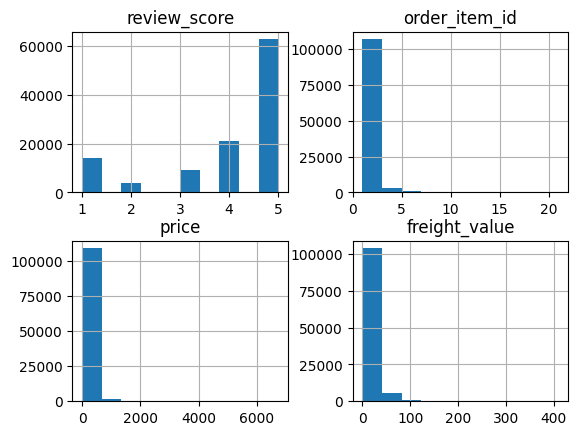

In [ ]:
products_review.hist()

In [ ]:
products_review_res = products_review.groupby(by="product_category_name")['review_score'].mean().sort_values(ascending=False).reset_index()
products_review_res

,product_category_name,review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.446266
3,costruction_tools_tools,4.444444
4,flowers,4.419355
...,...,...
66,fashion_male_clothing,3.641221
67,home_comfort_2,3.629630
68,office_furniture,3.493183
69,diapers_and_hygiene,3.256410


In [ ]:
buying_perform.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,111023,111023.000000,111023,111023,111023,111023.000000,111023.000000,111023
unique,97256,NaN,32328,3033,92053,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,11115
mean,NaN,1.198229,NaN,NaN,NaN,120.755104,20.025548,NaN
std,NaN,0.706931,NaN,NaN,NaN,183.372746,15.841472,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.310000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN


array([[<Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'freight_value'}>, <Axes: >]],
      dtype=object)

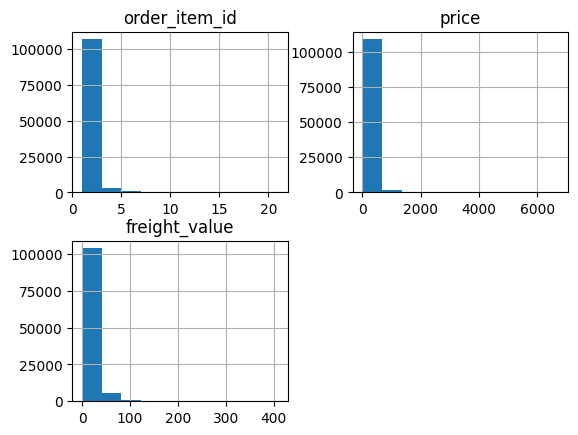

In [ ]:
buying_perform.hist()

In [ ]:
buying_perform_res = buying_perform.groupby(by="product_category_name")['order_id'].nunique().sort_values(ascending=False).reset_index()
buying_perform_res

,product_category_name,order_id
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


**Insight:**
- Setelah dilakukan pengelompokkan berdasarkan rata-rata review score, didapatkan produk cds dvds musicals menduduki posisi teratas dengan rata-rata nilai 4.6. Sedangkan pada posisi terbawah diduduki oleh security and services dengan rata-rata nilai 2.5
- Sementara pada tabel kedua dikelompokkan berdasarkan banyaknya order, didapakan produk bed bath table menduduki posisi teratas dengan jumlah order 9417 dan security and services menduduki posisi terbawah dengan jumlah order 2.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

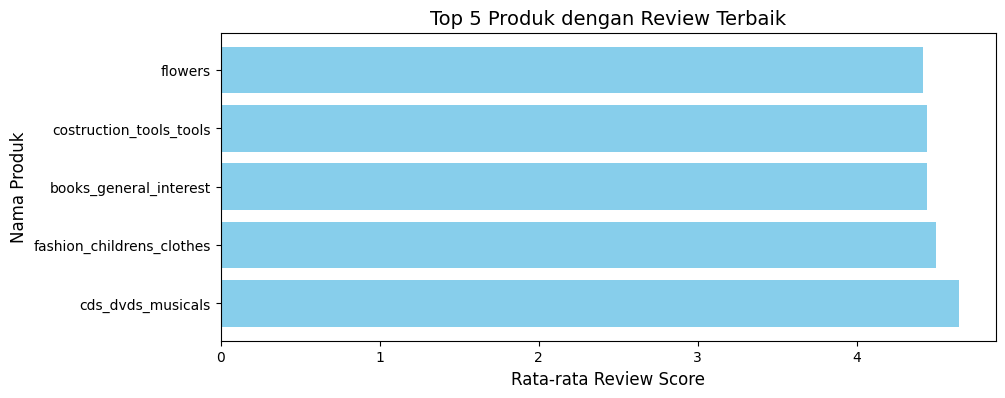

In [ ]:
plt.figure(figsize=(10, 4))
plt.barh(products_review_res['product_category_name'].head(), products_review_res['review_score'].head(), color='skyblue')

plt.title('Top 5 Produk dengan Review Terbaik', fontsize=14)
plt.xlabel('Rata-rata Review Score', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)

plt.show()

### Pertanyaan 2:

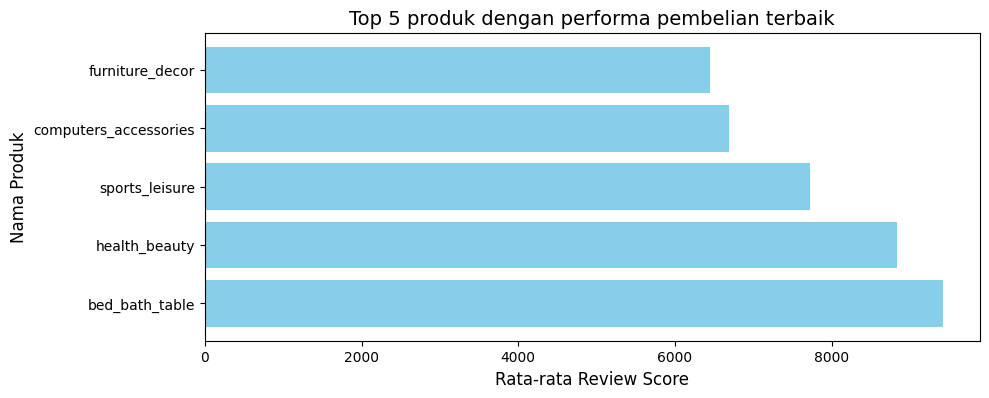

In [ ]:
plt.figure(figsize=(10, 4))
plt.barh(buying_perform_res["product_category_name"].head(), buying_perform_res["order_id"].head(), color='skyblue')

plt.title('Top 5 produk dengan performa pembelian terbaik', fontsize=14)
plt.xlabel('Rata-rata Review Score', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)

plt.show()

In [ ]:
products_review.to_csv("all_data.csv", index=False)

**Insight:**
- Bar chart menampilkan 5 posisi teratas dengan produk yang memiliki ulasan terbaik. Dapat dilihat bahwa produk cds dvds musicals memiliki review yang paling baik.
- Sedangkan untuk performa pembelian paling baik adalah produk bed bath table

## Conclusion

- Conclution pertanyaan 1 : Produk yang memiliki rata-rata ulasan paling baik adalah cds dvds musicals
- Conclution pertanyaan 2 : Produk dengan pembelian terbanyak adalah bed bath table